'''
전제<br>
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.<br>
신경망 학습은 다음과 같이 4단계로 수행한다.<br><br>
1단계 - 미니배치<br>
훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며,<br>
그 미니배치의 손실함수 값을 줄이는 것이 목표이다.<br><br>
2단계 - 기울기 산출<br>
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.<br>
기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.<br><br>
3단계 - 매개변수 갱신<br>
가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.<br><br>
4단계 - 반복<br>
1~3단계를 반복한다.<br>
데이터를 무작위로 선정하기 때문에 확률적 경사 하강법stochastic gradient descent,<br>
SGD라고 부른다.<br>

'''

In [4]:
import sys
import os
import numpy as np
sys.path.append("C:\\Users\\Administrator\\jupyter\\deep-learning-from-scratch-master")
from common.functions import *
from common.gradient import numerical_gradient

In [5]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [6]:
if __name__ == '__main__':
    net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
    print(net.params['W1'].shape)  # (784, 100)
    print(net.params['b1'].shape)  # (100,)
    print(net.params['W2'].shape)  # (100, 10)
    print(net.params['b2'].shape)  # (10,)

    x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
    t = np.random.rand(100, 10)   # 더미 정답 레이블(100장 분량)

    grads = net.numerical_gradient(x, t)  # 기울기 계산
    # 주의 : 실행하는데 아주 오래걸림
    print(grads['W1'].shape)  # (784, 100)
    print(grads['b1'].shape)  # (100,)
    print(grads['W2'].shape)  # (100, 10)
    print(grads['b2'].shape)  # (10,)


(784, 100)
(100,)
(100, 10)
(10,)
(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기


미니 배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사법으로 매개변수를 갱신합니다. 그럼 TwoLayerNet 클래스와 Mnist  데이터셋을 사용하여 학습을 수행해보자.

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.8062166666666667, 0.8073
train acc, test acc | 0.8800333333333333, 0.8844
train acc, test acc | 0.8994333333333333, 0.9033
train acc, test acc | 0.9096833333333333, 0.9108
train acc, test acc | 0.9161, 0.9176
train acc, test acc | 0.9198833333333334, 0.9202
train acc, test acc | 0.9244333333333333, 0.926
train acc, test acc | 0.9268666666666666, 0.9262
train acc, test acc | 0.9314, 0.9312
train acc, test acc | 0.9342666666666667, 0.9332
train acc, test acc | 0.93655, 0.9356
train acc, test acc | 0.9386666666666666, 0.9377
train acc, test acc | 0.9412, 0.9413
train acc, test acc | 0.9434833333333333, 0.9419
train acc, test acc | 0.9446833333333333, 0.9439
train acc, test acc | 0.9468666666666666, 0.9467


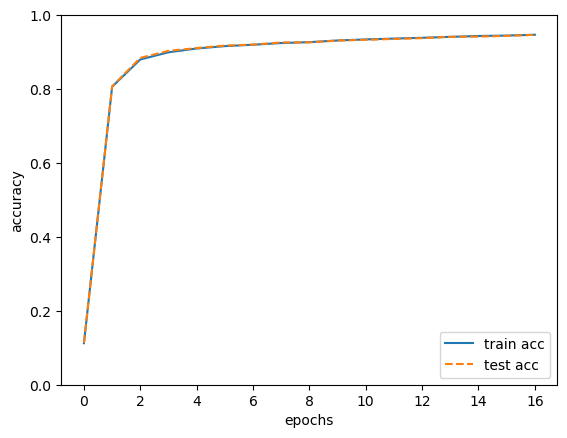

In [13]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1) #600

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)#오차 역전파법 사용 시간절약에 좋다.
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))#array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련데이터에 대한 정확도를 실선으로, 시험 데이터에 대한 정확도를 점선으로 그렸습니다. 보시다시피 에폭이 진행될수록(학습이 진행될 수록)
훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지고 있습니다. 또 두 정확도에는 차이가 없음을 알 수 있죠( 두선이 거의 겹쳐 있습니다.) 다시 말해 이번 학습에서는 오버 피팅이 일어나지 않았습니다.<br><br>

오버피팅이되면 어느순간부터 정확도가  점차 떨어지기 시작합니다. 오버피팅을 방지하는 방법중에는 조기 종료가 있고, 가중치 감소, 드롭아웃과 같은 대표적인 오버피팅 예방법을이 있습니다.

In [16]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [17]:
train_acc_list # 17번 학습했다. 10000번을 60000(train size)/100(미니배치) 로 나눈 값

[0.11236666666666667,
 0.8062166666666667,
 0.8800333333333333,
 0.8994333333333333,
 0.9096833333333333,
 0.9161,
 0.9198833333333334,
 0.9244333333333333,
 0.9268666666666666,
 0.9314,
 0.9342666666666667,
 0.93655,
 0.9386666666666666,
 0.9412,
 0.9434833333333333,
 0.9446833333333333,
 0.9468666666666666]

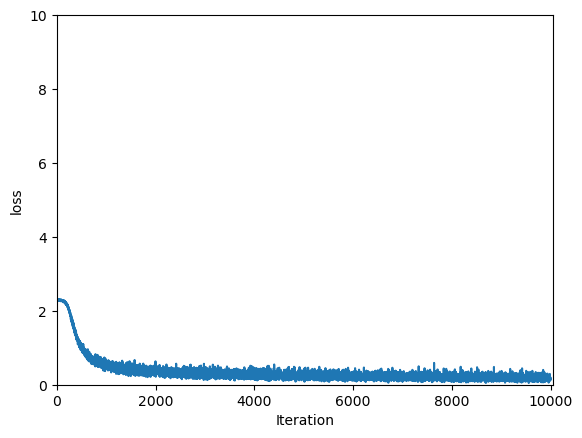

In [23]:
# 손실함수 값의 추이

x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train_loss_list')
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.xlim(0,10050)
plt.ylim(0, 10.0)
plt.show()

### 4.6 정리

가장 먼저 신경망이 학습을 수행할 수 있도록 손실 함수라는 '지표'를 도입하고 손실함수를 그 값이 가장 작아지는 가중치 매개변수 값을 찾아내는 것이 신경망 학습의 목표입니다.이 가능한 작은 손실 함수를 찾는 방법으로 경사법을 소개했고, 경사법은 함수의 기울기를 이용하는 방법입니다.


#### 이번장에서 배운 내용
- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 (다소 복잡한) 오차 역전파법은 기울기를 고속으로 구할 수 있다. 